In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import community 
import csv

## Definindo o tipo de grafo

In [2]:
# Não direcional
G = nx.Graph()
with open('relac3.csv', encoding='utf8',newline='') as f:
    reader = csv.reader(f)
    relac = [tuple(row) for row in reader]
for i in relac: 
    G.add_edge(i[0], i[1], relac = i[2])

# Direcional
D = nx.DiGraph()
with open('relac3.csv', encoding='utf8',newline='') as f:
    reader = csv.reader(f)
    relac = [tuple(row) for row in reader]
for i in relac: 
    D.add_edge(i[0], i[1], relac = i[2])
    
# Multidirecional    
M = nx.MultiDiGraph()
with open('relac2.csv', encoding='utf8',newline='') as f:
    reader = csv.reader(f)
    relac = [tuple(row) for row in reader]
for i in relac: 
    M.add_edge(i[0], i[1], relac = i[2])

## Plotando os Grafos

Spring Layout


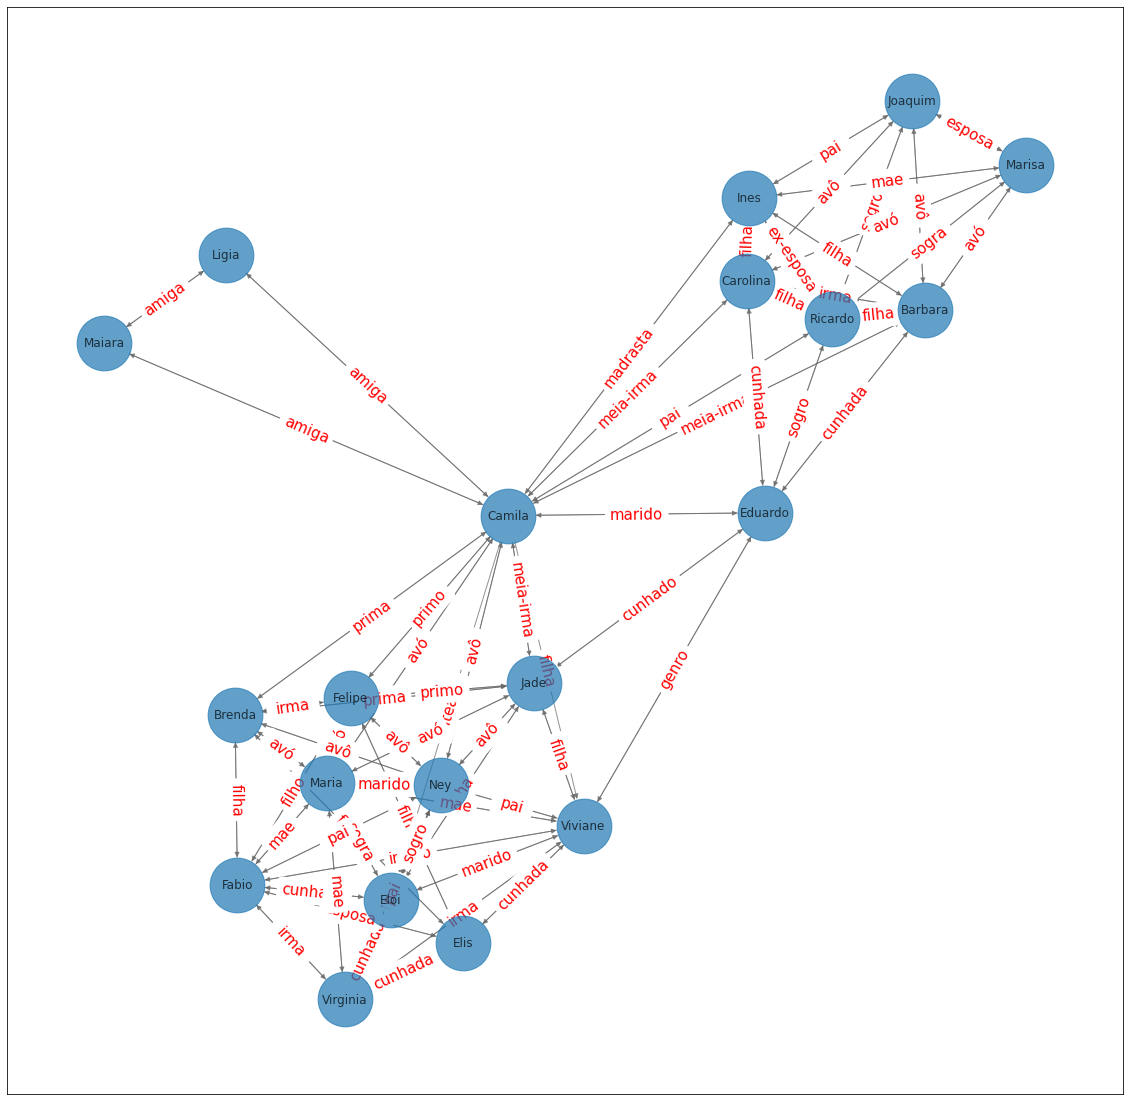

In [5]:
# Grafo com labels
plt.figure(figsize =(20, 20)) 
pos = nx.spring_layout(M
                      ) 
print("Spring Layout") 
  
nx.draw_networkx(M, pos,  
                 alpha = 0.7,  
                 with_labels = True,node_size = 3000,  
                 edge_color ='.4', cmap = plt.cm.Blues) 
edge_labels = nx.get_edge_attributes(M,'relac') 
formatted_edge_labels = {(elem[0],elem[1]):edge_labels[elem] for elem in edge_labels} 
nx.draw_networkx_edge_labels(M,pos,edge_labels=formatted_edge_labels,font_color='red',font_size=15)
plt.show()

In [6]:
# Direcional
from pyvis.network import Network
nt = Network("500px", "900px", notebook = True, directed = True)
nt.from_nx(D)
nt.show("grafoD.html")

In [7]:
# MultiDirecional
from pyvis.network import Network
nt = Network("500px", "900px", notebook = True, directed = True)
nt.from_nx(M)
nt.show("grafo.html")

In [8]:
# Não direcional
from pyvis.network import Network
nt = Network("500px", "900px", notebook = True, directed = False)
nt.from_nx(G)
nt.show("grafo.html")

## Vizinhos

In [9]:
#Grafo não direcionado
#Lista quais vértices estão ligados com um vértice específico 
list(G.neighbors('Jade'))

['Viviane', 'Eloi', 'Camila', 'Maria', 'Ney', 'Brenda', 'Felipe', 'Eduardo']

## Caminho mais curto entre um vértice e outro

In [12]:
# Grafo Direcionado
try:
    ccm = nx.dijkstra_path(D,source = 'Jade', target = 'Marisa')
    print('Caminho de custo mínimo: ',ccm)
except nx.NetworkXNoPath:
    print("Caminho não encontrado") 

Caminho não encontrado


In [10]:
# Grafo não direcionado
ccm = nx.dijkstra_path(G,source = 'Jade', target = 'Marisa')
print('Caminho de custo mínimo: ',ccm)

Caminho de custo mínimo:  ['Jade', 'Camila', 'Ines', 'Marisa']


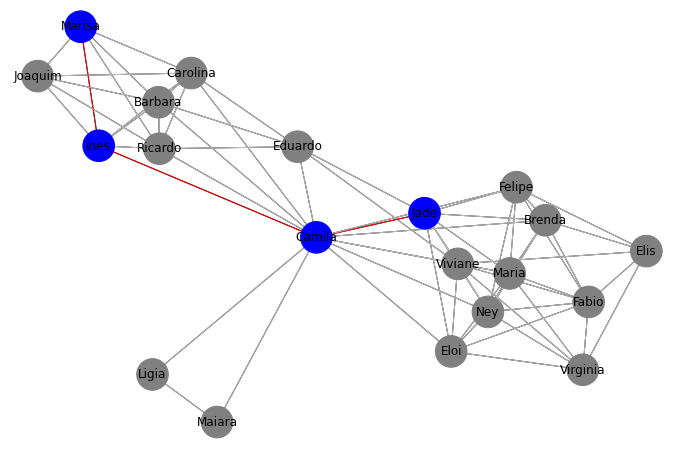

In [13]:
# Separa as arestas que fazem parte do menor caminho e guarda em arestas_vermelhas
arestas_vermelhas = list(zip(ccm,ccm[1:]))

# Marca os vértices que estão no CCM para serem pintados de azul e os outros de cinza
cor_vertices = ['grey' if not node in ccm else 'blue' for node in G.nodes()]

# Marca as arestas que estão no CCM para serem pintados de vermelho e as outras de prata
cor_arestas = ['silver' if not edge in arestas_vermelhas else 'red' for edge in G.edges()]

# plot da figura
plt.figure(1, figsize=(12, 8))

#Algoritmo de layout
pos=nx.fruchterman_reingold_layout(G)

#retira as bordas
plt.axis('off')

nx.draw_networkx(G, pos,node_color= cor_vertices, node_size=1000)
nx.draw_networkx_edges(G, pos,edge_color= cor_arestas)

plt.show()

# Medidas de Centralidade
Centralidade é uma medida de quão importante um vértice é no contexto de toda a rede. 

## Grau de Centralidade
São considerados mais centrais os vértices com maior quantidade de arestas, de forma que quando a rede é plotada, quanto maior o grau de um vértice, mais ao centro da rede ele estará

In [14]:
# Quantidade de arestas / ligações
sorted(G.degree, key=lambda x: x[1], reverse=True)[:5]

[('Camila', 14), ('Viviane', 9), ('Ney', 9), ('Maria', 9), ('Jade', 8)]

In [15]:
# grau de centralidade
centrality = nx.degree_centrality(G)
sorted(centrality.items(), reverse= True, key=lambda x: x[1])[:5]

[('Camila', 0.7368421052631579),
 ('Viviane', 0.47368421052631576),
 ('Ney', 0.47368421052631576),
 ('Maria', 0.47368421052631576),
 ('Jade', 0.42105263157894735)]

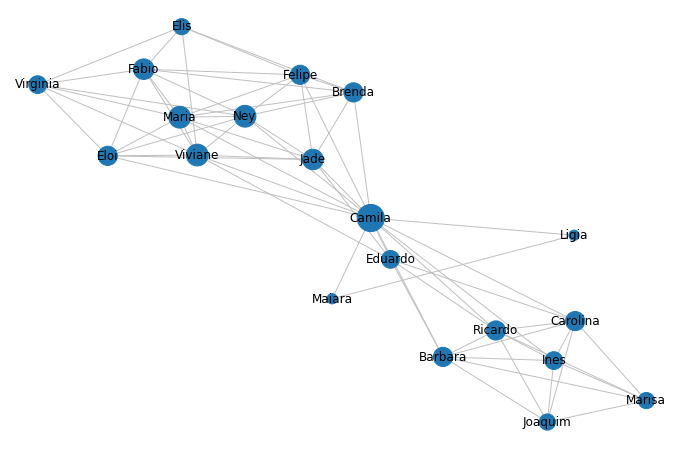

In [16]:
plt.figure(1, figsize=(12, 8))
plt.axis('off')
nx.draw_networkx(G, node_size=[v * 1000 for v in centrality.values()], edge_color='silver')

## Closeness
Esta medida de centralidade tenta expressar a importância de um vértice pelo fato dele estar próximo a muitos outros vértices.Quanto mais central for um nó, mais próximo estará de todos os outros nós.
Mede o número de caminhos mais curtos em que o nó se encontra. Essa centralidade costuma ser usada para determinar o fluxo de informações no gráfico. Quanto maior o número, mais informações fluem por ele.

In [17]:
for k, v in sorted(nx.closeness_centrality(G).items(), reverse= True, key=lambda x: x[1])[:5]:
    print(k, ':', v)

Camila : 0.7916666666666666
Viviane : 0.6129032258064516
Ney : 0.6129032258064516
Maria : 0.6129032258064516
Jade : 0.59375


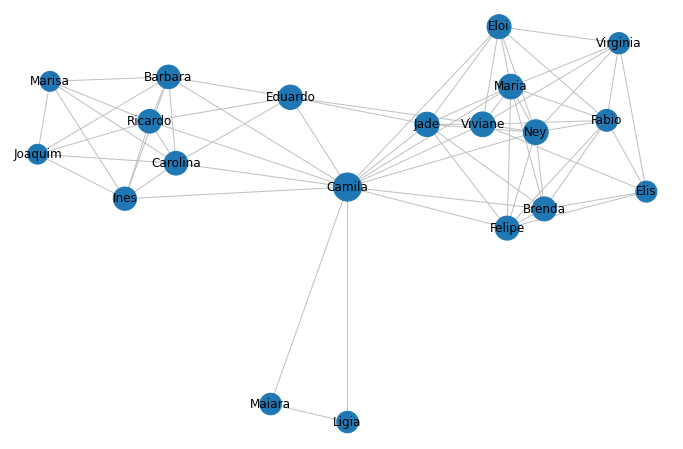

In [18]:
cc = nx.closeness_centrality(G)
plt.figure(1, figsize=(12, 8))
plt.axis('off')
nx.draw_networkx(G, node_size=[v * 1000 for v in cc.values()], edge_color='silver')

## Betweenness
Esta medida de centralidade reconhece como mais importantes os vértices que se localizam na rede de tal forma se localizem entre outros pares de vértices.
Quantifica o número de vezes que o nó age como ponte ao longo do caminho mais curto entre dois nós.
Medida para quantificar o controle de um ser humano sobre a comunicação entre outros seres humanos numa rede social.

In [19]:
for k, v in sorted(nx.betweenness_centrality(G).items(), reverse= True, key=lambda x: x[1])[:5]:
    print(k, ':', v)

Camila : 0.5236986227752617
Viviane : 0.08321152133094267
Ricardo : 0.04466486228566868
Barbara : 0.04466486228566868
Carolina : 0.04466486228566868


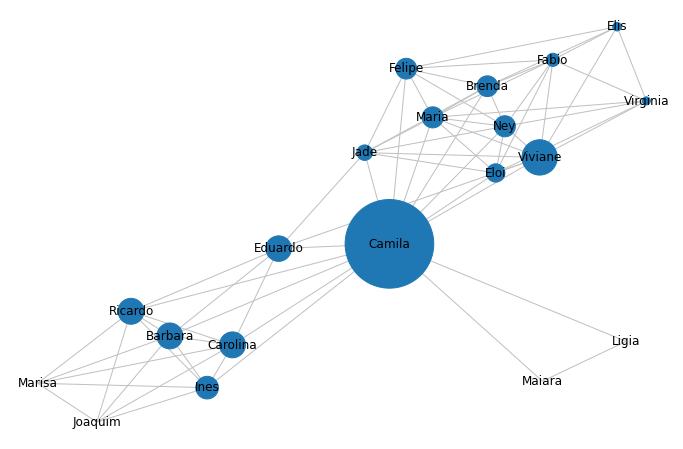

In [20]:
bc = nx.betweenness_centrality(G)
plt.figure(1, figsize=(12, 8))
plt.axis('off')
nx.draw_networkx(G, node_size=[v * 15000 for v in bc.values()], edge_color='silver')

## Centralidade de autovetor
Atribui maiores pesos aos vértices que estão conectados a outros vértices também importantes.

In [21]:
for k, v in sorted(nx.eigenvector_centrality(G).items(), reverse= True, key=lambda x: x[1])[:5]:
    print(k, ':', v)

Camila : 0.36558429229584927
Ney : 0.32632377592857303
Maria : 0.32632377592857303
Viviane : 0.30730266876669976
Jade : 0.2916541700905531


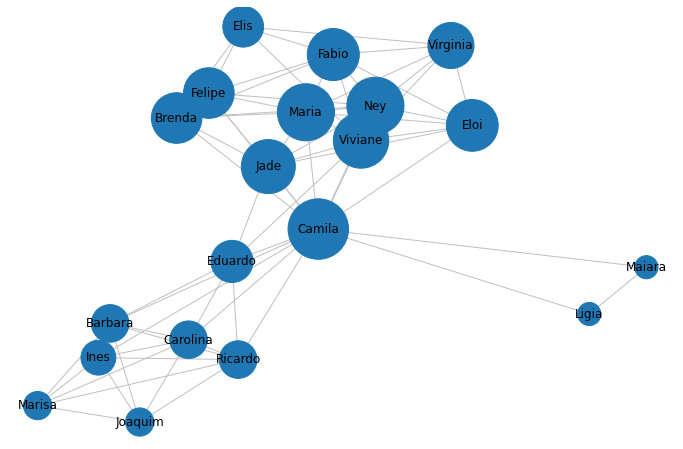

In [22]:
egvector = nx.eigenvector_centrality(G)
plt.figure(1, figsize=(12, 8))
plt.axis('off')
nx.draw_networkx(G, node_size=[v * 10000 for v in egvector.values()], edge_color='silver')

In [23]:
list(G.neighbors('Camila'))

['Viviane',
 'Eloi',
 'Jade',
 'Eduardo',
 'Ines',
 'Barbara',
 'Carolina',
 'Ricardo',
 'Maiara',
 'Ligia',
 'Maria',
 'Ney',
 'Brenda',
 'Felipe']

In [24]:
sorted(G.degree, key=lambda x: x[1], reverse=True)[:5]

[('Camila', 14), ('Viviane', 9), ('Ney', 9), ('Maria', 9), ('Jade', 8)]

## Partições

In [25]:
partition = community.best_partition(G, weight='weight')
print(partition)

{'Eloi': 0, 'Viviane': 0, 'Jade': 0, 'Camila': 1, 'Eduardo': 2, 'Ines': 2, 'Ricardo': 2, 'Barbara': 2, 'Carolina': 2, 'Fabio': 0, 'Virginia': 0, 'Elis': 0, 'Felipe': 0, 'Brenda': 0, 'Ney': 0, 'Maria': 0, 'Joaquim': 2, 'Marisa': 2, 'Maiara': 1, 'Ligia': 1}


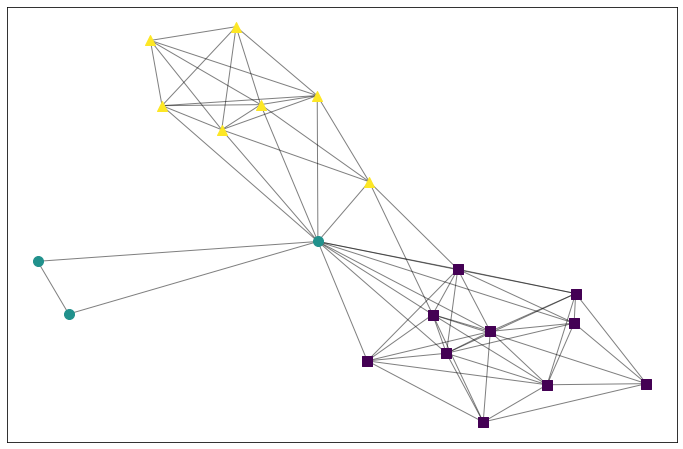

In [26]:
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
shapes = 'so^>v<dph8'

plt.figure(figsize=(12,8))
pos = nx.spring_layout(G)
# colorindo os nós conforme as comunidades encontradas
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_edges(G, pos, alpha=0.5)
for node, color in partition.items():
    nx.draw_networkx_nodes(G, pos, [node], node_size=100,
                           node_color=[cmap.colors[color]],
                           node_shape=shapes[color])